In [1]:
#to call all the time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from keras.layers import Conv1D, MaxPooling1D, Activation
from keras import optimizers
from keras import regularizers
from keras.callbacks import EarlyStopping
import json
import glob
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from tensorflow.keras import Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout
from keras.layers import BatchNormalization



from google.colab import drive
# For mouting Google drive to be used for data
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
def convert_data(start, stop, folder_name_json, file_name_text):
  '''
  start- starting of the video number to be added to text file
  stop - last video number to be added
  folder_name_json - path of json files for videos
  file_name_text -  path of text file where the key-point values are to stored
  '''
  with open(file_name_text,"w") as x:
    for i in range(start, stop+1):
          json_files = glob.glob(folder_name_json + '/'+ str(i)+"/*")
          j=0
          for jfile in json_files:
            if j< 140:
              j = j + 1
              with open(jfile) as f:
                  data = json.load(f)
                  if data['people']:
                      kp= data['people'][0]['pose_keypoints_2d']
                      kp = [ str(v) for v in kp]
                      r =','.join(kp)
                      x.write('{}\n'.format(r))

In [3]:
def read_data(file_name):
  '''
  INPUT: file_name = text file which is to be converted ito array
  OUTPUT: data = return the array
  '''
  number = [i for i in range(0, 74) if (i+1) % 3 != 0]
  data = np.loadtxt(file_name, usecols=number, delimiter = ",")
  return data

In [4]:
def generate_label():
  '''
  OUTPUT: Ytrain - labels for training data
          Yval - labels for validation data
  '''
  y = np.zeros(60)
  y = np.append(y, np.ones(80))        #1
  y = np.append(y, np.zeros(60))
  y = np.append(y, np.ones(80))        #2
  y = np.append(y, np.zeros(80))
  y = np.append(y, np.ones(60))        #3
  y = np.append(y, np.zeros(30))
  y = np.append(y, np.ones(110))       #4
  y = np.append(y, np.zeros(40))
  y = np.append(y, np.ones(100))       #5
  y = np.append(y, np.zeros(60))     
  y = np.append(y, np.ones(80))        #6
  y = np.append(y, np.zeros(60))
  y = np.append(y, np.ones(80))        #7
  y = np.append(y, np.zeros(30))
  y = np.append(y, np.ones(110))       #8
  y = np.append(y, np.zeros(30))
  y = np.append(y, np.ones(110))       #9
  y = np.append(y, np.zeros(60)) 
  y = np.append(y, np.ones(80))        #10
  y = np.append(y, np.zeros(30)) 
  y = np.append(y, np.ones(110))       #11
  y = np.append(y, np.zeros(60)) 
  y = np.append(y, np.ones(80))        #12
  y = np.append(y, np.zeros(2520))     #30
  y = np.append(y, np.zeros(90))
  y = np.append(y, np.ones(50))        #31
  y = np.append(y, np.zeros(40))
  y = np.append(y, np.ones(100))       #32
  y = np.append(y, np.zeros(60))
  y = np.append(y, np.ones(80))        #33
  y = np.append(y, np.zeros(30)) 
  y = np.append(y, np.ones(110))       #34
  y = np.append(y, np.zeros(30))
  y = np.append(y, np.ones(110))       #35
  y = np.append(y, np.zeros(30)) 
  y = np.append(y, np.ones(110))       #36
  y = np.append(y, np.zeros(60))
  y = np.append(y, np.ones(80))        #37
  y = np.append(y, np.zeros(60)) 
  y = np.append(y, np.ones(80))        #38
  y = np.append(y, np.zeros(80))
  y = np.append(y, np.ones(60))        #39
  y = np.append(y, np.zeros(60))
  y = np.append(y, np.ones(80))        #40
  y = np.append(y, np.zeros(30))
  y = np.append(y, np.ones(110))       #41
  y = np.append(y, np.ones(700))       #46
  y = np.append(y, np.zeros(420))      #49   
  y = np.append(y, np.zeros(60))
  y = np.append(y, np.ones(80))        #50
  y = np.append(y, np.zeros(420))      #53
  y = np.append(y, np.ones(840))       #59
  y = np.append(y, np.zeros(3500))     #84
  y = np.append(y, np.ones(840))       #90
  y = np.append(y, np.zeros(40))
  y = np.append(y, np.ones(100))       #91
  y = np.append(y, np.zeros(30))
  y = np.append(y, np.ones(110))       #92
  y = np.append(y, np.zeros(70))
  y = np.append(y, np.ones(70))        #93
  y = np.append(y, np.zeros(30))
  y = np.append(y, np.ones(110))       #94
  y = np.append(y, np.zeros(40)) 
  y = np.append(y, np.ones(100))       #95
  y = np.append(y, np.zeros(60))
  y = np.append(y, np.ones(80))        #96
  y = np.append(y, np.zeros(50)) 
  y = np.append(y, np.ones(90))        #97
  y = np.append(y, np.zeros(30)) 
  y = np.append(y, np.ones(110))       #98
  y = np.append(y, np.zeros(110))
  y = np.append(y, np.ones(30))        #99
  y = np.append(y, np.zeros(30))
  y = np.append(y, np.ones(110))       #100
  y = np.append(y, np.zeros(1260))       #109
  y = np.append(y, np.ones(1260))       #118
  y = np.append(y, np.zeros(2800))       #138
  y = np.append(y, np.ones(3080))       #160

  Ytrain = np.concatenate((y[:9800], y[16520:22400]), axis=0)
  Yval = y[9800:16520]

  return Ytrain,Yval

In [5]:
#GENERATING TRAINING AND VALIDATION ARRAYS:

#FOR X-file:
file_name_train = "/content/drive/My Drive/CSCE636/Train_Val_Test/X_train.txt"   ##CHANGE accordingly while increasing dataset##
Xtrain = read_data(file_name_train) 
file_name_train1 = "/content/drive/My Drive/CSCE636/Train_Val_Test/X_train_new.txt"   ##CHANGE accordingly while increasing dataset##
Xtrain_new = read_data(file_name_train1)
Xtrain = np.concatenate((Xtrain, Xtrain_new), axis=0)
Xtrain = Xtrain.reshape(1568,10,50) 

file_name_val = "/content/drive/My Drive/CSCE636/Train_Val_Test/X_val.txt"   ##CHANGE accordingly while increasing dataset##
Xval = read_data(file_name_val) 
file_name_val1 = "/content/drive/My Drive/CSCE636/Train_Val_Test/X_Val_new.txt"   ##CHANGE accordingly while increasing dataset##
Xval_new = read_data(file_name_val1)
Xval = np.concatenate((Xval, Xval_new), axis=0)
Xval = Xval.reshape(672,10,50)

#FOR Y-file:
Ytrain,Yval = generate_label()
Ytrain = Ytrain.reshape(1568,10,1)
Yval = Yval.reshape(672,10,1)

print('X-training = ', Xtrain.shape)
print('X-validation = ',Xval.shape)
print('Y-training = ', Ytrain.shape)
print('Y-validation = ',Yval.shape)

X-training =  (1568, 10, 50)
X-validation =  (672, 10, 50)
Y-training =  (1568, 10, 1)
Y-validation =  (672, 10, 1)


In [8]:
# Setting up early stopping criteria
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
path = '/content/drive/My Drive/CSCE636/Model/Submission8/model_submit8_epochs.{epoch:02d}-{val_accuracy:.2f}.hdf5'
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save = ModelCheckpoint(path, save_best_only=True, monitor='val_accuracy', mode='max')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=1, mode='min')

checkpoint = [earlyStopping, mcp_save, reduce_lr_loss]

In [7]:
  ###DATA AUGMENTATION###
A = np.random.normal(0.0, 10.0, (1568,10,50) )
Xtrain_noise = np.add(Xtrain , A)
Xtrain = np.concatenate((Xtrain,Xtrain_noise), axis=0)
print('X-training shape after adding noise = ' , Xtrain.shape)

Ytrain = np.concatenate((Ytrain,Ytrain), axis=0)
print('Y-training shape after adding noise = ' , Ytrain.shape)

X-training shape after adding noise =  (3136, 10, 50)
Y-training shape after adding noise =  (3136, 10, 1)


In [22]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(500, input_shape=(10,50), return_sequences=True))
model.add(tf.keras.layers.LSTM(500, input_shape=(10,50), return_sequences=True))
model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.2)))
model.add(tf.keras.layers.LSTM(500, input_shape=(10,50), return_sequences=True))
model.add(tf.keras.layers.LSTM(500, input_shape=(10,50), return_sequences=True))
model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.2)))
model.add(tf.keras.layers.Conv1D(500, kernel_size=2, strides=1,activation='relu',input_shape=(10,50), padding='same'))
model.add(BatchNormalization())
model.add(tf.keras.layers.LSTM(500, input_shape=(10,50), return_sequences=True))
model.add(tf.keras.layers.LSTM(500, input_shape=(10,50), return_sequences=True))
model.add(BatchNormalization())
model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5)))
model.add(tf.keras.layers.LSTM(500, return_sequences=True))
model.add(tf.keras.layers.LSTM(500, return_sequences=True))
model.add(BatchNormalization())
model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01))))
model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(1, activation='sigmoid')))

adam = tf.keras.optimizers.Adam(lr = 0.0001)
model.compile(loss = 'binary_crossentropy', optimizer=adam ,metrics = ['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 10, 500)           1102000   
_________________________________________________________________
lstm_9 (LSTM)                (None, 10, 500)           2002000   
_________________________________________________________________
time_distributed_5 (TimeDist (None, 10, 500)           0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 10, 500)           2002000   
_________________________________________________________________
lstm_11 (LSTM)               (None, 10, 500)           2002000   
_________________________________________________________________
time_distributed_6 (TimeDist (None, 10, 500)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 10, 500)          

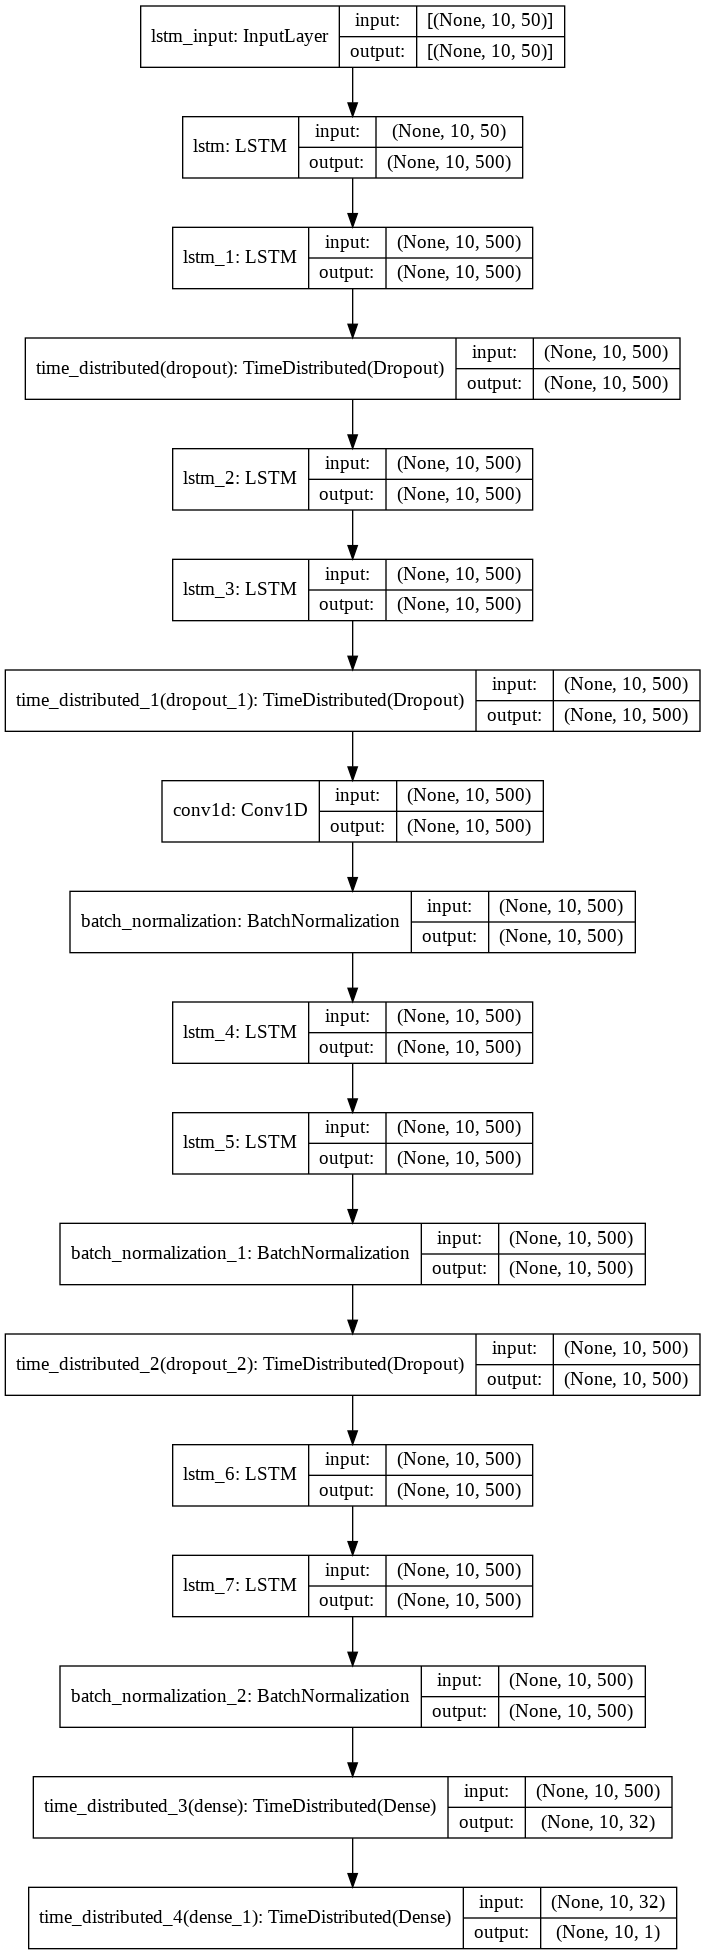

In [10]:
# from keras.utils.vis_utils import plot_model
# import tensorflow as tf
# tf.keras.utils.plot_model(model, to_file = '/content/drive/My Drive/CSCE636/model_submission8_plot.png', show_shapes=True, show_layer_names=True)

In [23]:
from matplotlib import pyplot
history = model.fit(Xtrain, Ytrain, batch_size =100, epochs = 500, verbose = 1, validation_data=(Xval, Yval),callbacks=checkpoint)

Epoch 1/500
32/32 [==============================] - 15s 144ms/step - loss: 1.1683 - accuracy: 0.7035 - val_loss: 1.2795 - val_accuracy: 0.5690
Epoch 2/500
32/32 [==============================] - 2s 69ms/step - loss: 0.9374 - accuracy: 0.8397 - val_loss: 1.2556 - val_accuracy: 0.6655
Epoch 3/500
32/32 [==============================] - 2s 69ms/step - loss: 0.8650 - accuracy: 0.8670 - val_loss: 1.2302 - val_accuracy: 0.6679
Epoch 4/500
32/32 [==============================] - 2s 70ms/step - loss: 0.8280 - accuracy: 0.8791 - val_loss: 1.2045 - val_accuracy: 0.6987
Epoch 5/500
32/32 [==============================] - 2s 70ms/step - loss: 0.7959 - accuracy: 0.8844 - val_loss: 1.1791 - val_accuracy: 0.7567
Epoch 6/500
32/32 [==============================] - 2s 71ms/step - loss: 0.7468 - accuracy: 0.8988 - val_loss: 1.1458 - val_accuracy: 0.7711
Epoch 7/500
32/32 [==============================] - 2s 71ms/step - loss: 0.7148 - accuracy: 0.8988 - val_loss: 1.0981 - val_accuracy: 0.8170
Epoc

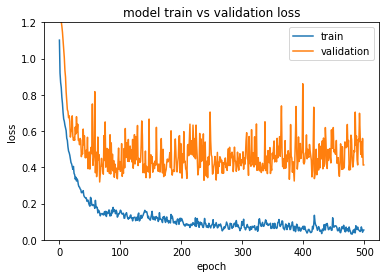

In [24]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.ylim([0,1.2])
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.show()

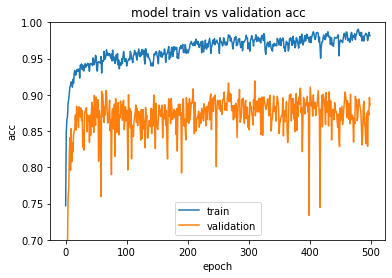

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model train vs validation acc')
plt.ylabel('acc')
plt.ylim([0.7,1])
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.show()

In [26]:
pred = model.predict(Xval)

In [27]:
pred.shape

(672, 10, 1)

In [28]:
predicted_class = pred.flatten()
predicted_class[predicted_class >= 0.5] = 1
predicted_class[predicted_class < 0.5] = 0

true = Yval.flatten()

In [29]:
import sklearn
from sklearn.metrics import accuracy_score
sklearn.metrics.accuracy_score(predicted_class, true)

0.8858630952380953